# アンサンブル学習

### バギングの中でも代表的なものである**ランダムフォレスト（Random Forest）**と
### ブースティングの中でも代表的なものである**勾配ブースティング（Gradient Boosting）**の使い方を使用します。

いずれも、ベースとしている学習器は決定木です。

データはHousingデータを使いました。

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=66)

models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0) 
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,test_score,train_score
GradientBoost,0.926076,0.977138
RandomForest,0.859954,0.967546


#### 変数の重要度

上記の結果から、勾配ブースティングの性能が高そうであることがわかります。

モデリングの中でどの変数が重要な役割を担ったかを定量的に把握することができます。具体的には各オブジェクトが持つ`feature_importmnces`属性にアクセスすることで、**変数の重要度（feature importance）**を取得することができます。

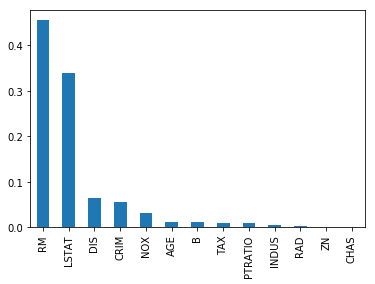

In [2]:
s = pd.Series(models['RandomForest'].feature_importances_,
              index=boston.feature_names)
s.sort_values(ascending=False).plot.bar(color='C0')

変数の重要度は情報利得をベースに計算されています。そのため変数の重要度を見ても回帰係数のような解釈は困難です。ただし、相対的な大小関係から、どの変数がモデリングにおいて重要であったかは示してくれますし、この変数が効果的であろうという直感と整合的な結果になることも少なくありませんから、確認する癖を付けておくことは大切です。

また、重要変数に絞り、説明変数と目的変数の関係を深堀りすれば、それがなぜモデリングに役立ったか考察することもできます。